<a href="https://colab.research.google.com/github/gunelatakishyeva/MachineLearningProjects/blob/main/Consumer_electronics_sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/consumer_electronics_sales_data.csv')
df

,ProductID,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,5874,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,5875,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,5876,Tablets,Samsung,2606.718293,63,0,1,5,1
3,5877,Smartphones,Samsung,870.395450,63,1,10,3,1
4,5878,Tablets,Sony,1798.955875,57,0,17,3,0
...,...,...,...,...,...,...,...,...,...
8995,14869,Smart Watches,Samsung,1041.149163,36,1,16,4,0
8996,14870,Smartphones,Samsung,1485.694311,57,0,5,1,1
8997,14871,Headphones,Samsung,2887.369597,28,0,18,4,0
8998,14872,Tablets,HP,1490.453964,38,0,4,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductID             9000 non-null   int64  
 1   ProductCategory       9000 non-null   object 
 2   ProductBrand          9000 non-null   object 
 3   ProductPrice          9000 non-null   float64
 4   CustomerAge           9000 non-null   int64  
 5   CustomerGender        9000 non-null   int64  
 6   PurchaseFrequency     9000 non-null   int64  
 7   CustomerSatisfaction  9000 non-null   int64  
 8   PurchaseIntent        9000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 632.9+ KB


In [7]:
df=df.drop('ProductID',axis=1)

In [8]:
df.head()

,ProductCategory,ProductBrand,ProductPrice,CustomerAge,CustomerGender,PurchaseFrequency,CustomerSatisfaction,PurchaseIntent
0,Smartphones,Other Brands,312.949668,18,0,2,1,0
1,Smart Watches,Samsung,980.389404,35,1,7,2,1
2,Tablets,Samsung,2606.718293,63,0,1,5,1
3,Smartphones,Samsung,870.395450,63,1,10,3,1
4,Tablets,Sony,1798.955875,57,0,17,3,0


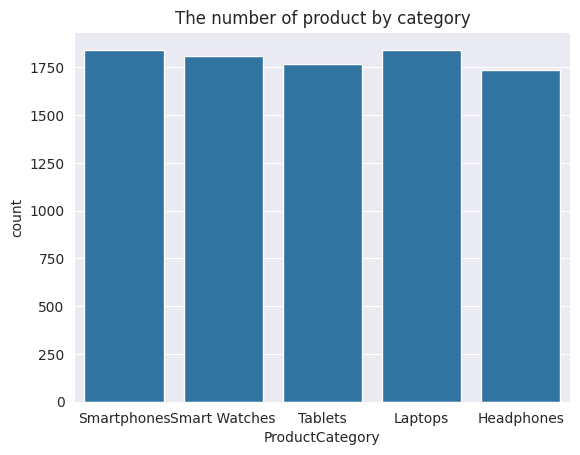

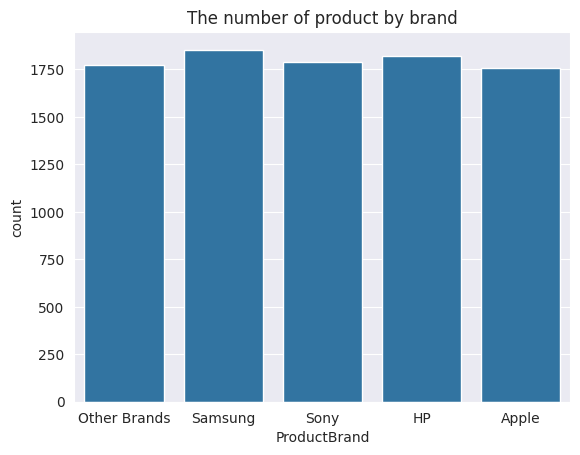

In [10]:
sns.set_style("darkgrid")
product_categorical = sns.countplot(data=df, x="ProductCategory")
product_categorical.set_title("The number of product by category")
plt.show()
product_brand = sns.countplot(data=df, x="ProductBrand")
product_brand.set_title("The number of product by brand")
plt.show()

                    mean      max     min
ProductCategory                          
Headphones       1567.21  2996.70  100.77
Laptops          1522.45  2997.86  101.91
Smart Watches    1538.93  2999.52  103.08
Smartphones      1479.30  2999.85  101.91
Tablets          1531.85  2998.32  100.38


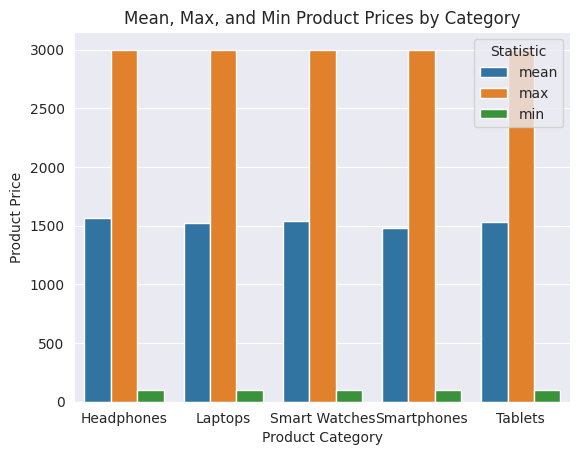

In [11]:
product = np.around(df.groupby("ProductCategory")["ProductPrice"].agg(["mean", "max", "min"]),2)
print(product)
product_long = product.reset_index().melt(id_vars="ProductCategory", value_vars=["mean", "max", "min"],
                                          var_name="Statistic", value_name="ProductPrice")

product_plot = sns.barplot(data=product_long, x="ProductCategory", y="ProductPrice", hue="Statistic")
product_plot.set_xlabel('Product Category')
product_plot.set_ylabel('Product Price')
product_plot.set_title('Mean, Max, and Min Product Prices by Category')

plt.show()

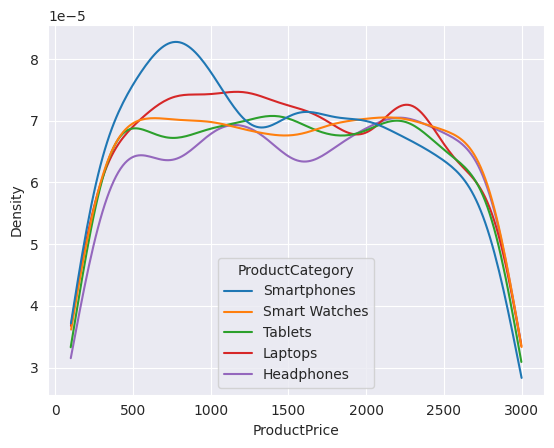

In [13]:
sns.kdeplot(data=df, x="ProductPrice", hue="ProductCategory", cut=0)
plt.show()

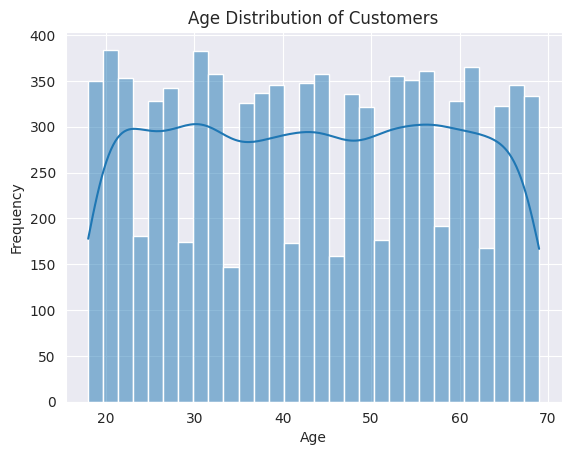

In [14]:
age_distribution = sns.histplot(data=df, x="CustomerAge", bins=30, kde=True)
age_distribution.set_title("Age Distribution of Customers")
age_distribution.set_xlabel("Age")
age_distribution.set_ylabel("Frequency")
plt.show()

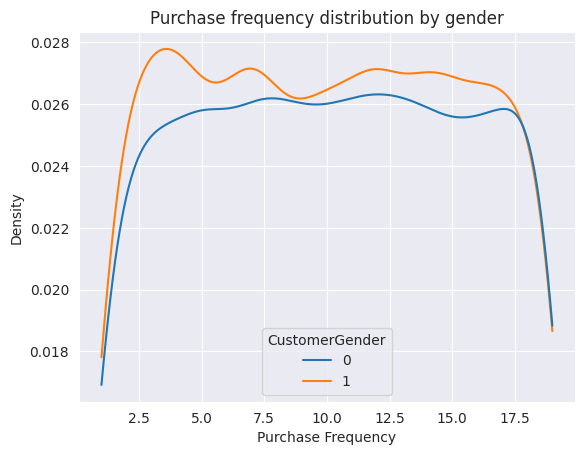

In [15]:
distribution_PurchaseFrequency = sns.kdeplot(data=df, x="PurchaseFrequency", hue="CustomerGender", cut=0)
distribution_PurchaseFrequency.set_title("Purchase frequency distribution by gender")
distribution_PurchaseFrequency.set_xlabel("Purchase Frequency")
plt.show()

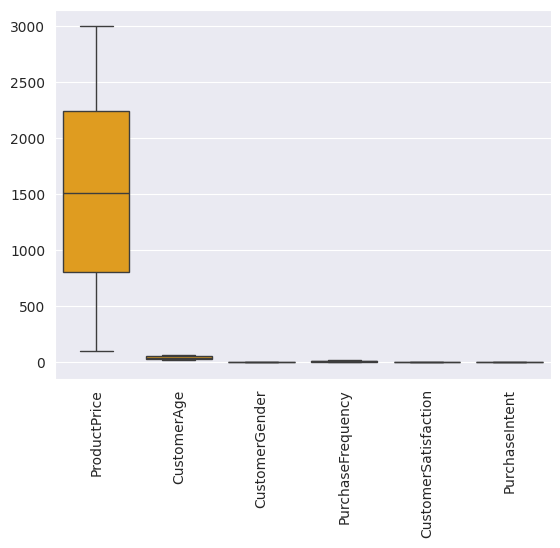

In [19]:
sns.boxplot(df,color='orange')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='count'>

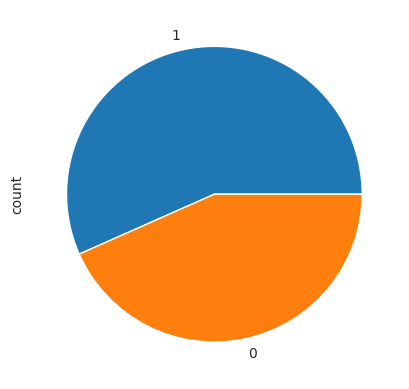

In [20]:
df['PurchaseIntent'].value_counts().plot(kind='pie')

In [22]:
X=df.drop('PurchaseIntent',axis=1)
y=df['PurchaseIntent'].copy()

In [23]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=42)

In [24]:
num_features=X_train.select_dtypes(include=[np.number]).columns
cat_features=X_train.select_dtypes(exclude=[np.number]).columns

In [25]:
num_features

Index(['ProductPrice', 'CustomerAge', 'CustomerGender', 'PurchaseFrequency',
       'CustomerSatisfaction'],
      dtype='object')

In [26]:
cat_features

Index(['ProductCategory', 'ProductBrand'], dtype='object')

In [28]:
df.isna().sum()

ProductCategory         0
ProductBrand            0
ProductPrice            0
CustomerAge             0
CustomerGender          0
PurchaseFrequency       0
CustomerSatisfaction    0
PurchaseIntent          0
dtype: int64

In [30]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

num_pipeline=make_pipeline(StandardScaler())
cat_pipeline=make_pipeline(OneHotEncoder(handle_unknown='ignore'))

transformer=ColumnTransformer([
    ('num_pipeline',num_pipeline,num_features),
    ('cat_pipeline',cat_pipeline,cat_features)
],remainder='passthrough')

In [31]:
X_transformed_train=transformer.fit_transform(X_train)
X_transformed_valid=transformer.transform(X_valid)
X_transformed_test=transformer.transform(X_test)

In [40]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

rnd_clf=RandomForestClassifier()
svc_clf=SVC()
log_reg=LogisticRegression()

In [42]:
rnd_clf.fit(X_transformed_train,y_train)
svc_clf.fit(X_transformed_train,y_train)
log_reg.fit(X_transformed_train,y_train)

LogisticRegression()

In [34]:
rnd_clf.score(X_transformed_train,y_train)

1.0

In [35]:
rnd_clf.score(X_transformed_test,y_test)

0.9533333333333334

In [36]:
rnd_clf.score(X_transformed_valid,y_valid)

0.9548611111111112

In [37]:
svc_clf.score(X_transformed_train,y_train)

0.9361111111111111

In [38]:
svc_clf.score(X_transformed_test,y_test)

0.9327777777777778

In [39]:
svc_clf.score(X_transformed_valid,y_valid)

0.9381944444444444

In [43]:
log_reg.score(X_transformed_train,y_train)

0.8532986111111112

In [44]:
log_reg.score(X_transformed_test,y_test)

0.8527777777777777

In [45]:
log_reg.score(X_transformed_valid,y_valid)

0.8618055555555556

In [46]:
vot_clf=VotingClassifier(
    estimators=[
        ('rnd_clf',RandomForestClassifier(random_state=42)),
        ('svc_clf',SVC(random_state=42)),
        ('log_reg',LogisticRegression(random_state=42))
    ]
)
vot_clf.fit(X_transformed_train,y_train)

VotingClassifier(estimators=[('rnd_clf',
                              RandomForestClassifier(random_state=42)),
                             ('svc_clf', SVC(random_state=42)),
                             ('log_reg', LogisticRegression(random_state=42))])

In [47]:
vot_clf.score(X_transformed_train,y_train)

0.9440972222222223

In [48]:
vot_clf.score(X_transformed_test,y_test)

0.9411111111111111

In [49]:
vot_clf.score(X_transformed_valid,y_valid)

0.94375

In [51]:
from sklearn.model_selection import cross_val_predict
y_pred_train = cross_val_predict(vot_clf,X_transformed_train,y_train,cv = 3)

In [52]:
from sklearn.metrics import f1_score
f1_score(y_train,y_pred_train)

0.9422371638141808

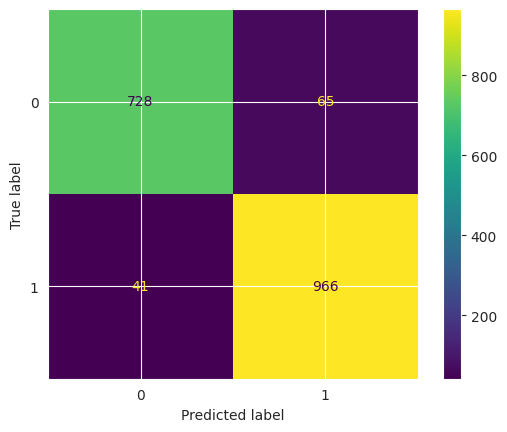

In [58]:
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import ConfusionMatrixDisplay as cmd

y_pred=vot_clf.predict(X_transformed_test)
cm = conf(y_test, y_pred)
disp = cmd(confusion_matrix=cm)
disp.plot()
plt.show()